In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

# Inspect the dataset
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
(1453, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  --

In [4]:
# Handle missing values in 'Like' and 'Age' columns
df['Like'] = df['Like'].replace({'I love it!+5': 5, 'I hate it!-5': -5})
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')
df['Like'].fillna(df['Like'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop unnecessary columns (like 'Gender' or any other non-numeric columns)
df.drop(columns=['Gender'], axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Standardize the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
print(pca_df.head())


       PCA1      PCA2
0  1.348347 -1.036017
1 -0.722346  0.911243
2  0.140664  0.791497
3 -0.374245 -0.736500
4  0.006704 -1.423536


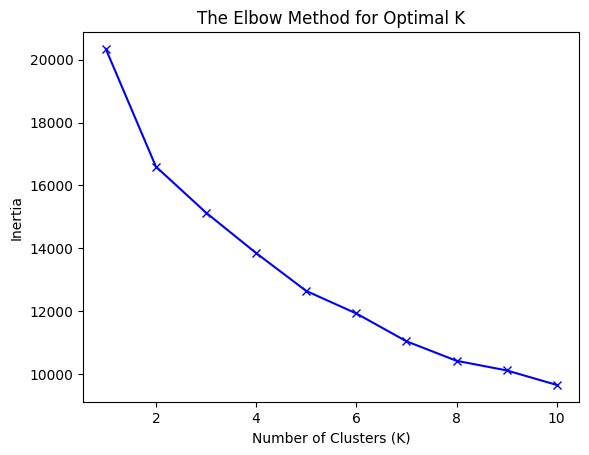

In [6]:
# Find optimal K using Elbow Method
inertia = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i, random_state=42)
    kmean.fit(scaled_df)
    inertia.append(kmean.inertia_)

# Plot inertia values
plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('The Elbow Method for Optimal K')
plt.show()

# Fit KMeans with the chosen number of clusters
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(scaled_df)
df['Cluster'] = kmeans_model.labels_


In [7]:
# Split the data
X = df.drop(['Cluster'], axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
model = DecisionTreeClassifier()

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters found: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.94
Confusion Matrix:
[[ 47   0   2   0]
 [  0 156   3   0]
 [  3   9 114   5]
 [  1   3   2  91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.93      0.98      0.95       159
           2       0.94      0.87      0.90       131
           3       0.95      0.94      0.94        97

    accuracy                           0.94       436
   macro avg       0.94      0.94      0.94       436
weighted avg       0.94      0.94      0.94       436



In [8]:
import pickle

# Save the model
filename = 'optimized_decision_tree_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load the model from the file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Evaluate the loaded model
loaded_model_accuracy = loaded_model.score(X_test, y_test)
print(f'Loaded Model Accuracy: {loaded_model_accuracy * 100:.2f}%')


Loaded Model Accuracy: 93.58%


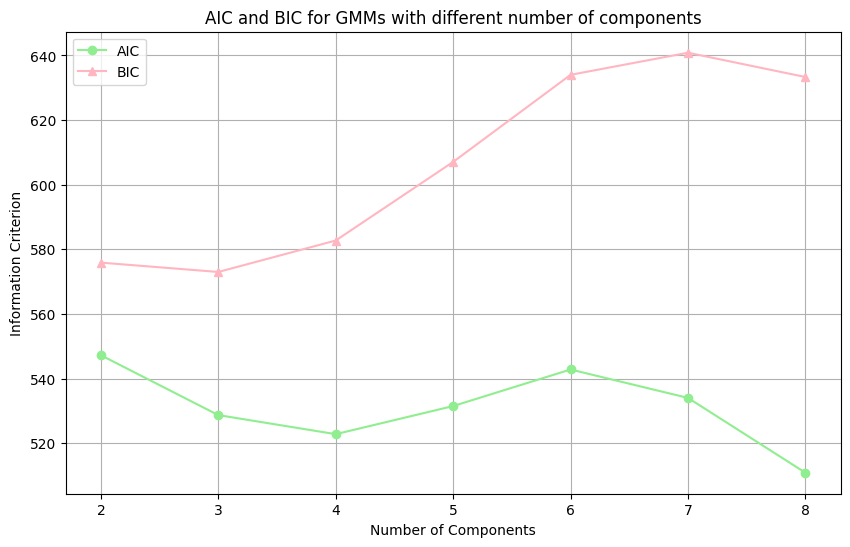

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming your original data is in a DataFrame called 'MD_x'
# Replace this with your actual DataFrame name if different

# Create a sample DataFrame (replace this with your actual data loading)
MD_x = pd.DataFrame({'feature1': np.random.rand(100), 'feature2': np.random.rand(100)})

# Scale the data
MD_x_scaled = StandardScaler().fit_transform(MD_x) # Create and assign the scaled data to MD_x_scaled

# Fit Gaussian Mixture Models from k = 2 to 8
n_components_range = range(2, 9)
models = {}
aic_values = []
bic_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(MD_x_scaled)

    aic_values.append(gmm.aic(MD_x_scaled))
    bic_values.append(gmm.bic(MD_x_scaled))
    models[n_components] = gmm

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, marker='o', label='AIC' ,color='lightgreen')
plt.plot(n_components_range, bic_values, marker='^', label='BIC', color='lightpink')
plt.title('AIC and BIC for GMMs with different number of components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

In [12]:

# Select the model with k=4
MD_m4 = models[4]

# Get predicted clusters from KMeans (assuming MD.k4 is your KMeans model)
# For demonstration here, I'll assume you are using k=5 from KMeans already fitted
from sklearn.cluster import KMeans

# Perform KMeans clustering (example code for KMeans)
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_scaled)

# Create a DataFrame to hold the cluster assignments
kmeans_df = pd.DataFrame({'KMeans_Cluster': kmeans_labels})

# Create a DataFrame with the GMM clusters
gmm_labels = MD_m4.predict(MD_x_scaled)
gmm_df = pd.DataFrame({'GMM_Cluster': gmm_labels})

# Combine the two DataFrames
combined_df = pd.concat([kmeans_df, gmm_df], axis=1)

# Generate a contingency table for KMeans vs GMM clusters
contingency_table = pd.crosstab(combined_df['KMeans_Cluster'], combined_df['GMM_Cluster'])
print(contingency_table)

# Get the log-likelihood for the GMM model
log_likelihood_m4 = MD_m4.score(MD_x_scaled) # This gives the average log-likelihood value
print("Log-Likelihood for GMM with k=4:", log_likelihood_m4)

GMM_Cluster      0   1   2   3
KMeans_Cluster                
0                3   5   0  13
1                2   0  19   0
2                0  20   0   0
3               20   0   0   0
4                0   0  18   0
Log-Likelihood for GMM with k=4: -2.3840662163344972


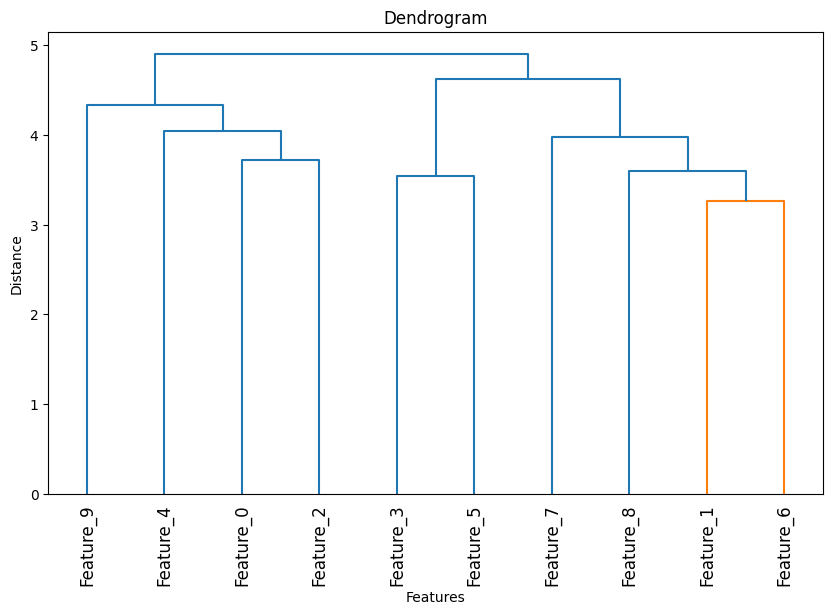

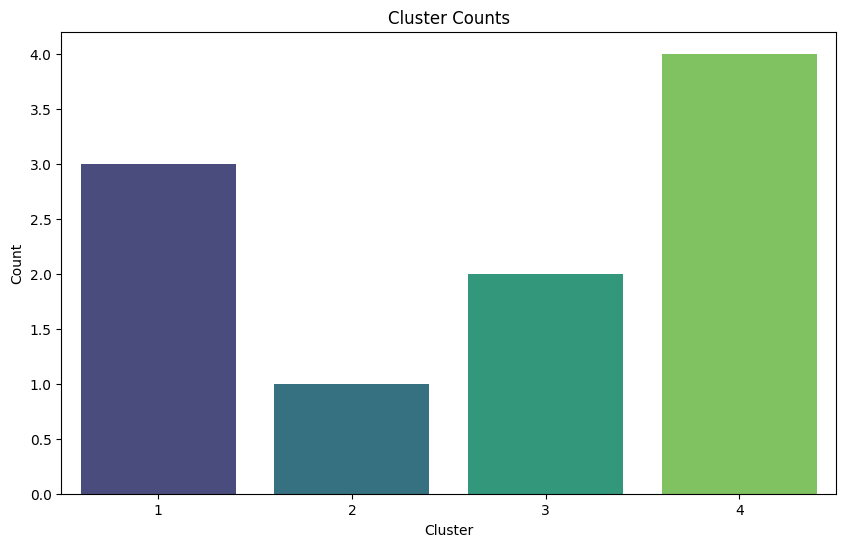

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)\nplt.title('PCA Plot with Clusters')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nplt.show()\n\n# Step 6: Project Axes on PCA plot\nfor i in range(len(MD_x.columns)):\n    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,\n              color='gray', alpha=0.5,\n              head_width=0.1, head_length=0.1)\n\nplt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Plot with Projected Axes')\nplt.grid()\nplt.show()\n"

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

# Step 1: Simulate some example data for MD.x
np.random.seed(0)  # For reproducibility
num_samples = 100
num_features = 10

# Create a random DataFrame (replace this with your actual data loading)
MD_x = pd.DataFrame(np.random.rand(num_samples, num_features),
                    columns=[f'Feature_{i}' for i in range(num_features)])

# Step 2: Perform hierarchical clustering
MD_x_transposed = MD_x.T  # Transpose the data
dist_matrix = pdist(MD_x_transposed)  # Calculate distance matrix
MD_vclust = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

# Step 3: Create cluster assignments using a method, e.g., fcluster
from scipy.cluster.hierarchy import fcluster

# Create clusters (for example, using 4 clusters)
MD_k4 = fcluster(MD_vclust, t=4, criterion='maxclust')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, labels=MD_x.columns, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Step 4: Create a bar chart of cluster sizes
cluster_counts = pd.Series(MD_k4).value_counts().sort_index()

# Plot bar chart of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Step 5: Project PCA and plot the results
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)  # Perform PCA
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)
plt.title('PCA Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Project Axes on PCA plot
for i in range(len(MD_x.columns)):
    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,
              color='gray', alpha=0.5,
              head_width=0.1, head_length=0.1)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projected Axes')
plt.grid()
plt.show()
'''

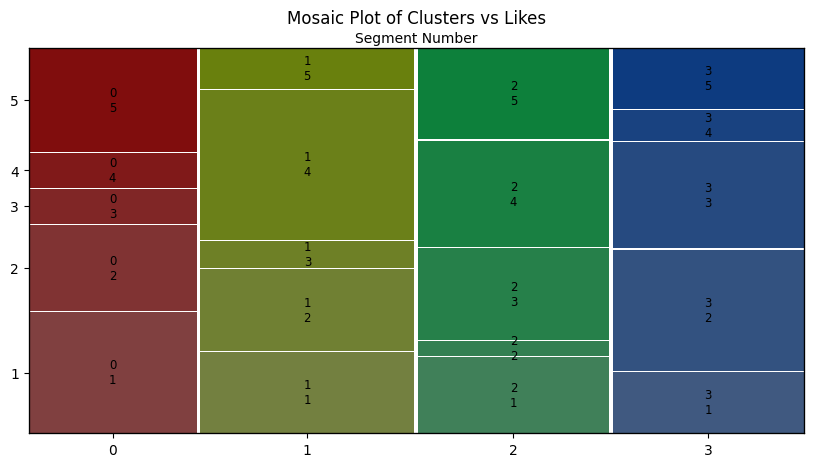

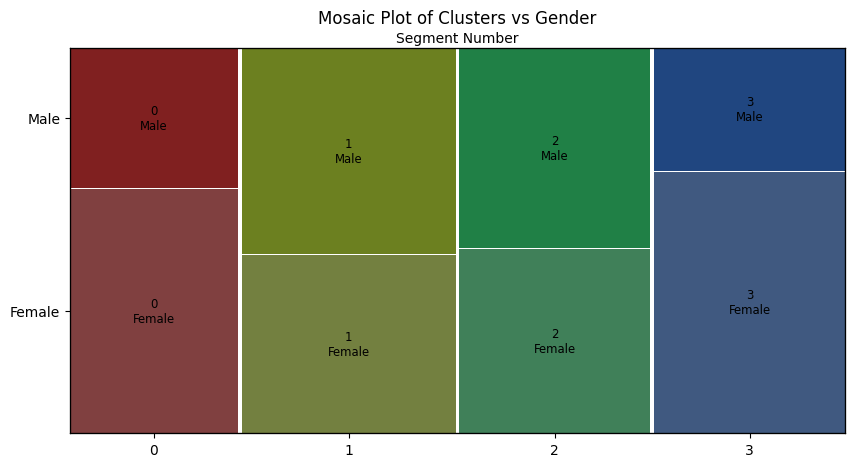

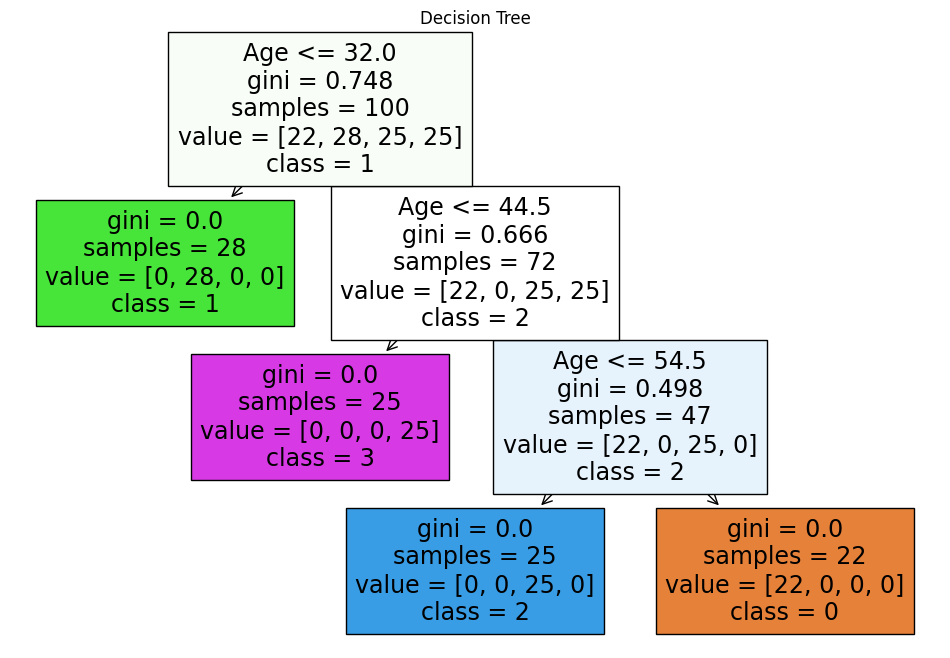

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for `mcdonalds`
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to `mcdonalds`
mcdonalds = pd.DataFrame({
    'Like': np.random.randint(1, 6, size=num_samples),  # Assuming 'Like' values between 1 to 5
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
})

# Create the 'Like.n' column for derived variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
mcdonalds['k4'] = kmeans.fit_predict(mcdonalds[['Like.n', 'Age', 'VisitFrequency']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_like = pd.crosstab(mcdonalds['k4'], mcdonalds['Like'])
k4_crosstab_gender = pd.crosstab(mcdonalds['k4'], mcdonalds['Gender'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_like.stack(), title='Mosaic Plot of Clusters vs Likes', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Like Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Gender', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Gender Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
mcdonalds['Gender_encoded'] = label_encoder.fit_transform(mcdonalds['Gender'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonalds['k4'])

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Calculate visitation and likes means
visit = mcdonalds.groupby('k4')['VisitFrequency'].mean()
like = mcdonalds.groupby('k4')['Like.n'].mean()
female = mcdonalds.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())


